# Closest pairs

In this noteobok, we are going to test the different strategies for the problem of finding the closest pairs of points in a graph.

- The **brute force** approach: eveluation of all the pairs
- The **divide to conquer** aprroch: with a split of the graph on the x-axis

In [1]:
from inputs import InputListPointsXY as Points
from utils import euclidean_distance as d

(<Figure size 1332x1332 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12032c510>)

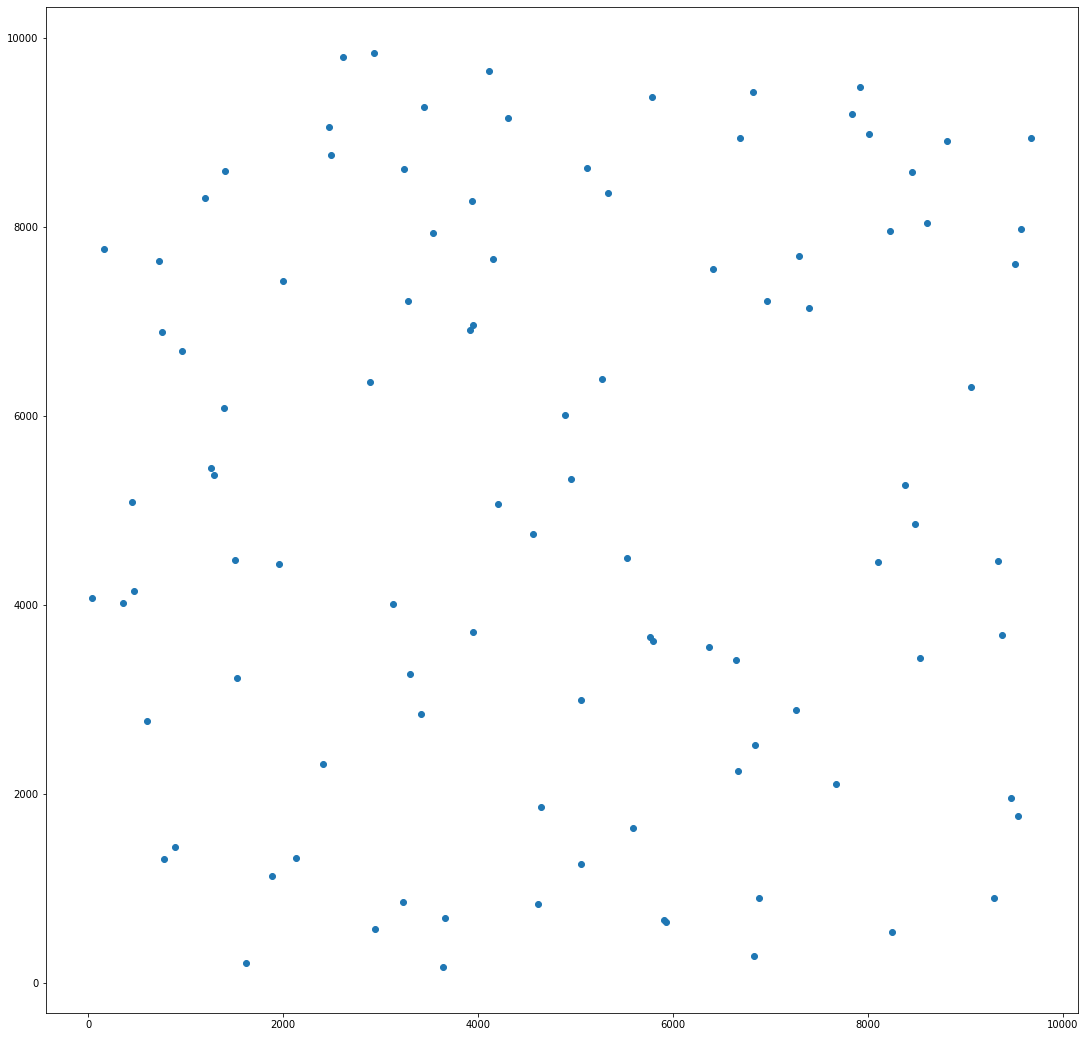

In [2]:
example_points = Points(l_length=100)
example_points.plot()

## Brute force

As mentionned in the README.md file, this approach compares every pairs of points to reevaluate the minimum

In [3]:
def brute_force_closest_pairs(input_points):
    # Initialize the closest pair as being the first two elements of input_list_pairs
    point_min1, point_min2, min_distance = 0, 1, d(input_points[0], input_points[1])
    for i, point1 in enumerate(input_points):
        for j, point2 in enumerate(input_points[i+1:], i+1):
            if d(point1, point2) < min_distance:
                point_min1, point_min2, min_distance = i, j, d(point1, point2)
                print(f'The minimal distance between the points is now {d(point1, point2)}')
    return point_min1, point_min2, min_distance

brute_force_closest_pairs(Points(l_length=1000))

The minimal distance between the points is now 1337.8325754742257
The minimal distance between the points is now 982.342099270921
The minimal distance between the points is now 958.5744624180221
The minimal distance between the points is now 945.4231856687247
The minimal distance between the points is now 769.041611357929
The minimal distance between the points is now 180.42727066604982
The minimal distance between the points is now 100.22474744293447
The minimal distance between the points is now 71.00704190430693
The minimal distance between the points is now 41.86884283091664
The minimal distance between the points is now 29.410882339705484
The minimal distance between the points is now 24.596747752497688
The minimal distance between the points is now 8.602325267042627
The minimal distance between the points is now 8.246211251235321
The minimal distance between the points is now 6.082762530298219


(309, 653, 6.082762530298219)

Note that the if statement is true around 10 times for a 1000-point long list, which is an indicator of the lack of performance of the algorithm. 
More precisely the nested loops have 1000 choose 2 = **499500** iterations.

Let's compute the indicator of performance as:
`nb of reeavaluations of the min / nb of itarations`

In [4]:
def brute_force_closest_pairs_performance(input_points):
    # Initialize the closest pair as being the first two elements of input_list_pairs
    point_min1, point_min2, min_distance = 0, 1, d(input_points[0], input_points[1])
    # Initialize the counters
    nb_itarations, nb_reevaluations_min = 0, 0
    for i, point1 in enumerate(input_points):
        for j, point2 in enumerate(input_points[i+1:], i+1):
            nb_itarations += 1
            if d(point1, point2) < min_distance:
                nb_reevaluations_min += 1
                point_min1, point_min2, min_distance = i, j, d(point1, point2)
    return round((nb_reevaluations_min / nb_itarations) * 100, 3)

print(f'The indicator of the performance of the algorithm could be: \n \
    {brute_force_closest_pairs_performance(Points(l_length=1000))} %')

The indicator of the performance of the algorithm could be: 
     0.001 %


You can run the previous cell several times and see that it stays under the 0.01%

Let's save a clean version of the brute force function in a.py file and import it

In [5]:
from closet_pairs_algorithms import brute_force_coordinates as bf_c

## Visualize the solution

Let's draw a line between the two closet points to check if the solution looks correct

(<Figure size 1332x1332 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1212fb110>)

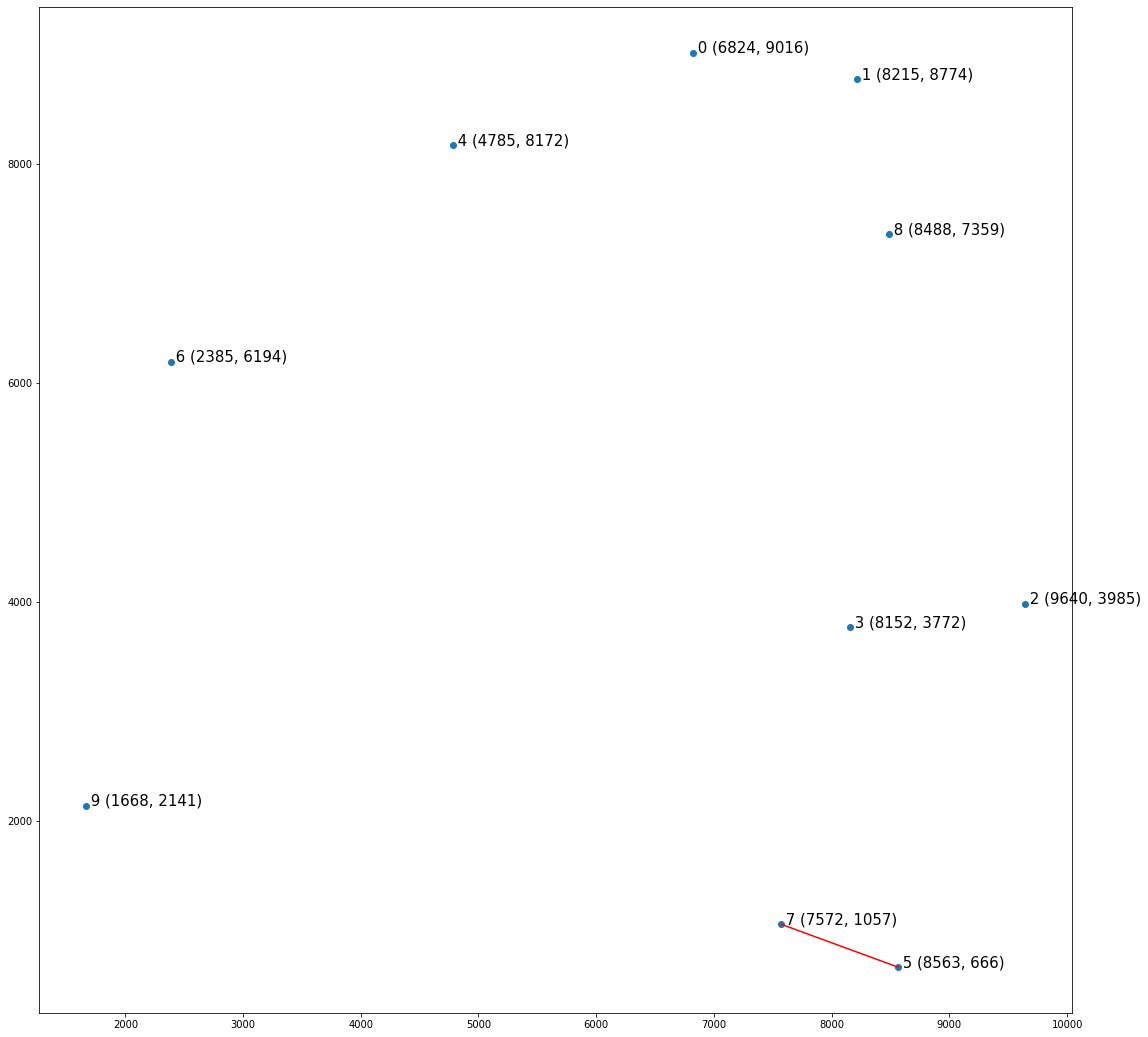

In [6]:
# Generate a set of 10 point
example_points = Points(l_length=10)
# Compute the solution
point1, point2, _ = bf_c(example_points)
# Draw the line and show the solution
example_points.plot_line_between(point1, point2, annotate=True)

## Divide to conquer approach

In [7]:
from closet_pairs_algorithms import brute_force_points as bf_p

In [13]:
def closet_pair(P):
    if len(P) <= 3:
        return bf_p(P) 
    else:
        print(f'P: {P}')
        # Sort P by x coordinate: Px
        Px = sorted(P, key=lambda x: x[0])
        # Sort P by y coordinate: Py
        Py = sorted(P, key=lambda x: x[1])
        print(f'Px: {Px}')
        half = int(len(P)/2)
        # Use Px tp split P in Q and R
        Q, R = Px[:half], Px[half:]
        print(f'Q: {Q}')
        print(f'R: {R}')
        p1, q1, min_d1 = closet_pair(Q)
        p2, q2, min_d2 =  closet_pair(R)
        delta = min(min_d1, min_d2)
        p3, q3, min_dist = closest_split_pair(Px, Py, delta)

def closest_split_pair(Px, Py, delta):
    xm = Px[-1]
    Sy = make_Sy(Px, xm, delta)
    p3, q3, min_dist = None, None, delta
    for i, point1 in enumerate(Sy):
        for _, point2 in enumerate(Sy[i+1, i+8], i+1):
            if d(point1, point2) < delta:
                p3, q3, min_dist = point1, point2, d(point1, point2)
    return p3, q3, min_dist
    
    
    
    
def make_Sy(Px, xm, delta):
    Sy = []
    for point in Px:
        if point[0] < xm - delta and point[0] > xm + delta:
            Sy.append(point)
    Sy = sorted(Sy, key=lambda x: x[1])
    return Sy
    
    
    
    
P = Points(l_length=11, min_value=0, max_value=100)
closet_pair(P)


P: [(42, 20), (16, 96), (22, 59), (30, 50), (20, 70), (87, 24), (93, 99), (2, 94), (19, 27), (14, 25), (99, 33)]
Px: [(2, 94), (14, 25), (16, 96), (19, 27), (20, 70), (22, 59), (30, 50), (42, 20), (87, 24), (93, 99), (99, 33)]
Q: [(2, 94), (14, 25), (16, 96), (19, 27), (20, 70)]
R: [(22, 59), (30, 50), (42, 20), (87, 24), (93, 99), (99, 33)]
P: [(2, 94), (14, 25), (16, 96), (19, 27), (20, 70)]
Px: [(2, 94), (14, 25), (16, 96), (19, 27), (20, 70)]
Q: [(2, 94), (14, 25)]
R: [(16, 96), (19, 27), (20, 70)]


TypeError: unsupported operand type(s) for -: 'tuple' and 'float'